In [2]:
#Data Science For Smart Cities 
#FSU 
#Social and economic impacts of COVID-19 on Florida(Tallahassee) and predicting housing indexes and
#insurance claims,crimes and unemployement during pandemic times 
# Data collection is crucial to this project where in data is collected from varied sources.
# After Data collection , it will be followed by data cleaning,aggregation and merging different data collected from 
#multiple sources
# After the data preparation stage , we will do Exploratory data analysis on some part of the data to find
#out the social and economic factors before , during and after covid. We will make possible suggestions 
#in case of similar pandemic conditions. 
#After the EDA analyis with the time series data collected from 2017 - 2021 on monthly basis is used to uncover the 
#hidden patterns in understanding and predicting the impact of COVID-19 or similar pandemic situation on the 
#housing prices, insurance claimed , employement , unmployement and crime incidents.
#Here the number of covid patients can be considered as number of persons directly infected by the pandemic, 
#we will use this number to represent the number of people affected in any similar pandemic situations in future.
#Here we will do time series modelling and figure to predict the parameters discussed above.
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
#import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

from scipy import stats
from scipy.stats import norm, skew   # specifically for staistics

In [3]:
#Data Analysis
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


#For missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Warnings
import warnings
warnings.filterwarnings('ignore')

#Preprocessing
from sklearn import preprocessing

#Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


#Machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#Random forest
from sklearn.ensemble import RandomForestClassifier


#Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
#importing the csv file
xl_file = pd.ExcelFile('/Users/shivrachamalla/Desktop/Project/Book2(AutoRecovered).xlsx')
df_covid = xl_file.parse('covid')

In [5]:
#checking whether data is populated 
df_covid.head()

,Date,ConfirmedGrowth,DailyDeaths,Confirmed,Deaths,Geography
0,2020-03-01,0,0,0,0,Florida
1,2020-03-02,0,0,0,0,Florida
2,2020-03-03,0,0,0,0,Florida
3,2020-03-04,0,0,0,0,Florida
4,2020-03-05,1,0,1,0,Florida


In [6]:
df_covid.head()

,Date,ConfirmedGrowth,DailyDeaths,Confirmed,Deaths,Geography
0,2020-03-01,0,0,0,0,Florida
1,2020-03-02,0,0,0,0,Florida
2,2020-03-03,0,0,0,0,Florida
3,2020-03-04,0,0,0,0,Florida
4,2020-03-05,1,0,1,0,Florida


In [7]:
df_covid.Date = pd.to_datetime(df_covid.Date)

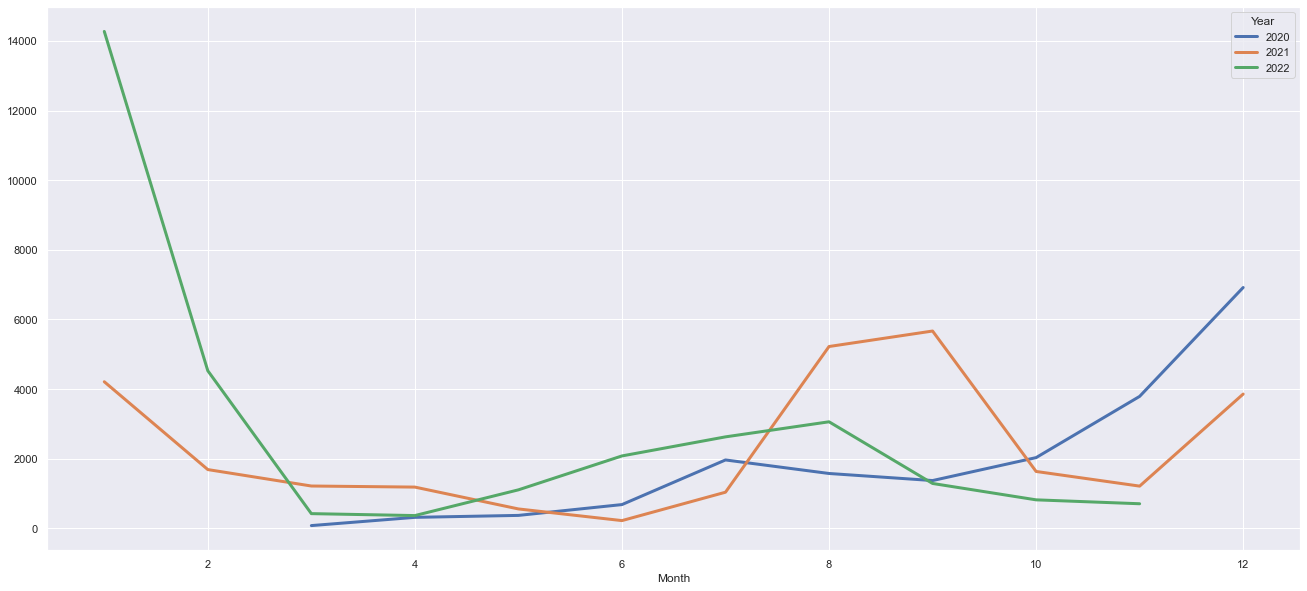

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
season = df_covid
season['Date'] = df_covid.Date
season['Year'] = df_covid['Date'].dt.year
season['Month'] = df_covid['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'ConfirmedGrowth', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()
#every year its peaking in the month of september and january 
#covid-19 in Memphis(Tennessee) is usually low in the months of may and march and april

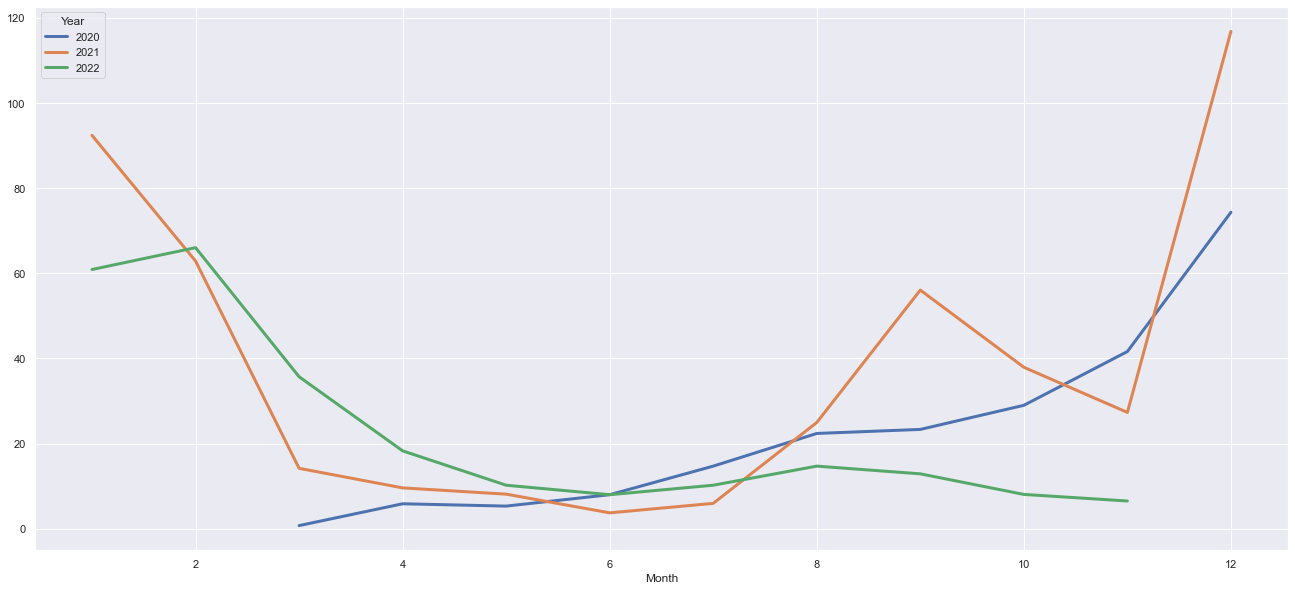

In [9]:
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'DailyDeaths', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()
#daily deaths also follows same pattern but one thing to notice is that
#though the number of cases are high in the year 2022 than that of 2021 but deaths are not high 
#this behaviour can be attribute to successfull vaccination programme and immunity developed by people

In [10]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1002 non-null   datetime64[ns]
 1   ConfirmedGrowth  1002 non-null   int64         
 2   DailyDeaths      1002 non-null   int64         
 3   Confirmed        1002 non-null   int64         
 4   Deaths           1002 non-null   int64         
 5   Geography        1002 non-null   object        
 6   Year             1002 non-null   int64         
 7   Month            1002 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 62.8+ KB


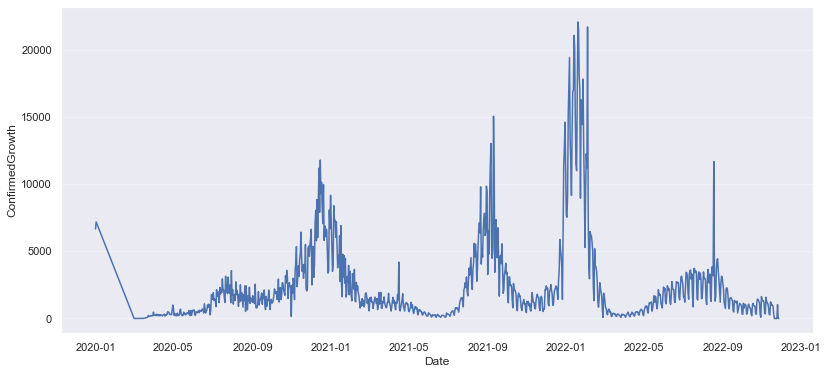

In [11]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df_covid['Date'], y=df_covid['ConfirmedGrowth'])
plt.grid(axis='x')
plt.grid(axis='y', alpha=0.3)
plt.show()

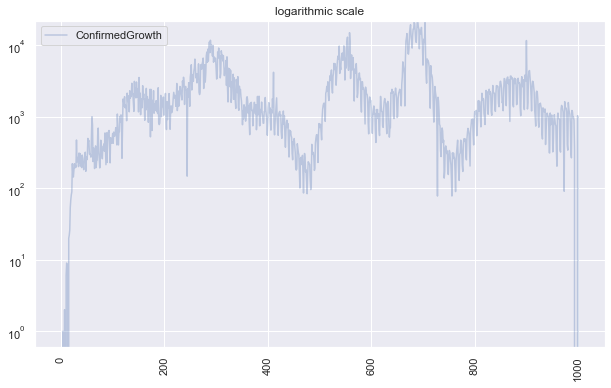

In [12]:
plt.figure(num=None, figsize=(20, 6))

plt.subplot(1,2,2)
ax = df_covid['ConfirmedGrowth'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_yscale('log')
ax.set_ylim(0, np.max(df_covid['ConfirmedGrowth'] + 100))
plt.xticks(rotation=90)
plt.title("logarithmic scale")
ax.legend()

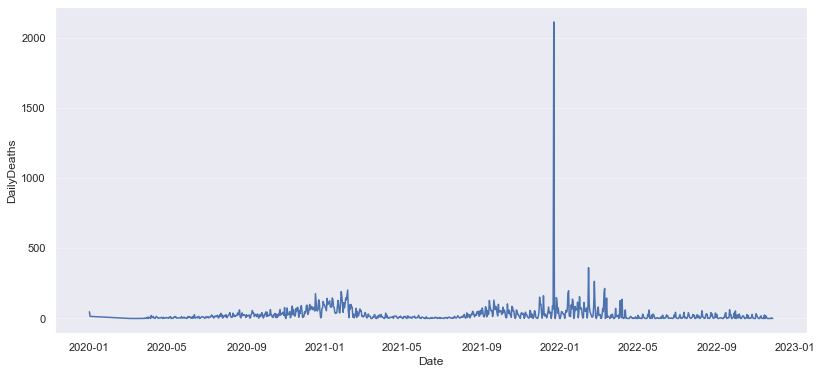

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df_covid['Date'], y=df_covid['DailyDeaths'])
plt.grid(axis='x')
plt.grid(axis='y', alpha=0.3)
plt.show()

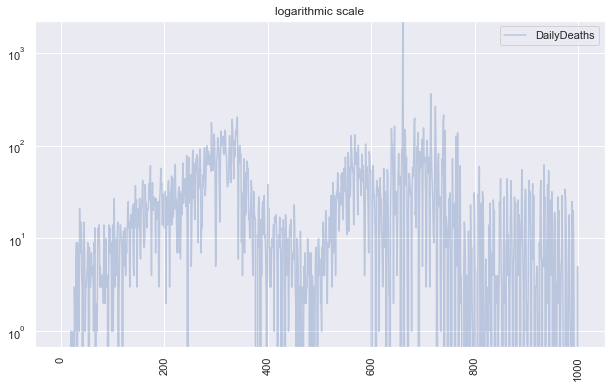

In [14]:

plt.figure(num=None, figsize=(20, 6))

plt.subplot(1,2,2)
ax = df_covid['DailyDeaths'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_yscale('log')
ax.set_ylim(0, np.max(df_covid['DailyDeaths'] + 100))
plt.xticks(rotation=90)
plt.title("logarithmic scale")
ax.legend()

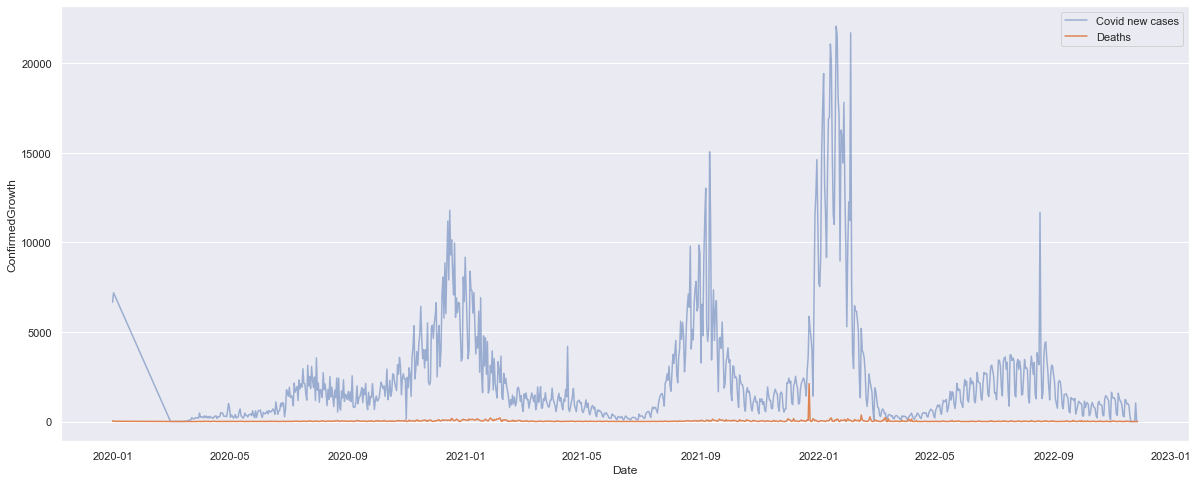

In [15]:
plt.figure(figsize=(18,8))
sns.lineplot(x=df_covid['Date'], y=df_covid['ConfirmedGrowth'], alpha=0.5, label='Covid new cases')
sns.lineplot(x=df_covid['Date'], y=df_covid['DailyDeaths'], label='Deaths')
plt.grid(axis='x')
plt.legend()
plt.show()

In [16]:
def indexing(stock):
    stock.index = stock['Date']
    return stock

In [17]:
weeks = [4, 16, 28, 40, 52]

In [18]:
indexing(df_covid)

,Date,ConfirmedGrowth,DailyDeaths,Confirmed,Deaths,Geography,Year,Month
Date,,,,,,,,
2020-03-01,2020-03-01,0,0,0,0,Florida,2020,3
2020-03-02,2020-03-02,0,0,0,0,Florida,2020,3
2020-03-03,2020-03-03,0,0,0,0,Florida,2020,3
2020-03-04,2020-03-04,0,0,0,0,Florida,2020,3
2020-03-05,2020-03-05,1,0,1,0,Florida,2020,3
...,...,...,...,...,...,...,...,...
2022-11-23,2022-11-23,0,0,2384048,28293,Florida,2022,11
2022-11-24,2022-11-24,0,0,2384048,28293,Florida,2022,11
2022-11-25,2022-11-25,1036,5,2385084,28298,Florida,2022,11


In [19]:
def plot_time_series(stock, weeks = [4, 16, 28, 40, 52]):
    
    dummy = pd.DataFrame()
    # First Resampling into Weeks format to calculate for weeks
    dummy['ConfirmedGrowth'] = stock['ConfirmedGrowth'].resample('W').mean() 
     
    for i in range(len(weeks)):
        m_a = dummy['ConfirmedGrowth'].rolling(weeks[i]).mean() # M.A using inbuilt function
        dummy[" Mov.AVG for " + str(weeks[i])+ " Weeks"] = m_a
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(weeks[i], dummy['ConfirmedGrowth']))
    dummy.plot(title="Moving Averages for covid cases" )

Calculated Moving Averages: for 4 weeks: 

 Date
2020-01-05    6925.000000
2020-01-12            NaN
2020-01-19            NaN
2020-01-26            NaN
2020-02-02            NaN
                 ...     
2022-10-30     990.571429
2022-11-06    1072.000000
2022-11-13     928.285714
2022-11-20     802.571429
2022-11-27     148.000000
Freq: W-SUN, Name: ConfirmedGrowth, Length: 152, dtype: float64
Calculated Moving Averages: for 16 weeks: 

 Date
2020-01-05    6925.000000
2020-01-12            NaN
2020-01-19            NaN
2020-01-26            NaN
2020-02-02            NaN
                 ...     
2022-10-30     990.571429
2022-11-06    1072.000000
2022-11-13     928.285714
2022-11-20     802.571429
2022-11-27     148.000000
Freq: W-SUN, Name: ConfirmedGrowth, Length: 152, dtype: float64
Calculated Moving Averages: for 28 weeks: 

 Date
2020-01-05    6925.000000
2020-01-12            NaN
2020-01-19            NaN
2020-01-26            NaN
2020-02-02            NaN
                 ... 

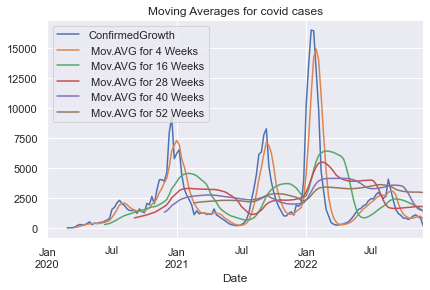

In [20]:
plot_time_series(df_covid)

In [21]:
def plot_time_series1(stock, weeks = [4, 16, 28, 40, 52]):
    
    dummy = pd.DataFrame()
    # First Resampling into Weeks format to calculate for weeks
    dummy['DailyDeaths'] = stock['DailyDeaths'].resample('W').mean() 
     
    for i in range(len(weeks)):
        m_a = dummy['DailyDeaths'].rolling(weeks[i]).mean() # M.A using inbuilt function
        dummy[" Mov.AVG for " + str(weeks[i])+ " Weeks"] = m_a
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(weeks[i], dummy['DailyDeaths']))
    dummy.plot(title="Moving Averages for covid cases" )

Calculated Moving Averages: for 4 weeks: 

 Date
2020-01-05    31.500000
2020-01-12          NaN
2020-01-19          NaN
2020-01-26          NaN
2020-02-02          NaN
                ...    
2022-10-30     6.714286
2022-11-06    10.571429
2022-11-13     5.428571
2022-11-20     8.428571
2022-11-27     0.714286
Freq: W-SUN, Name: DailyDeaths, Length: 152, dtype: float64
Calculated Moving Averages: for 16 weeks: 

 Date
2020-01-05    31.500000
2020-01-12          NaN
2020-01-19          NaN
2020-01-26          NaN
2020-02-02          NaN
                ...    
2022-10-30     6.714286
2022-11-06    10.571429
2022-11-13     5.428571
2022-11-20     8.428571
2022-11-27     0.714286
Freq: W-SUN, Name: DailyDeaths, Length: 152, dtype: float64
Calculated Moving Averages: for 28 weeks: 

 Date
2020-01-05    31.500000
2020-01-12          NaN
2020-01-19          NaN
2020-01-26          NaN
2020-02-02          NaN
                ...    
2022-10-30     6.714286
2022-11-06    10.571429
2022-11-13 

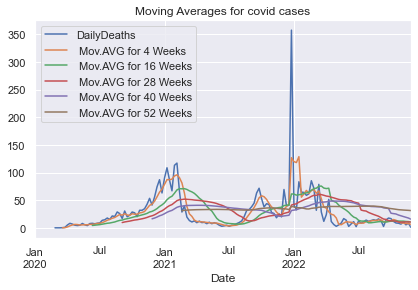

In [22]:
plot_time_series1(df_covid)

In [23]:
df_covid.groupby(df_covid.Date.dt.year)['ConfirmedGrowth'].sum()

Date
2020    599355
2021    836724
2022    949005
Name: ConfirmedGrowth, dtype: int64

In [24]:
df_covid.groupby(df_covid.Date.dt.year)['ConfirmedGrowth'].sum().max()

949005

In [25]:
df_covid.groupby(df_covid.Date.dt.month)['ConfirmedGrowth'].sum()

Date
1     578434
2     173940
3      53070
4      55857
5      62917
6      89388
7     174372
8     305505
9     249748
10    138854
11    169032
12    333967
Name: ConfirmedGrowth, dtype: int64

In [26]:
df_covid.groupby(df_covid.Date.dt.month)['ConfirmedGrowth'].sum().max()

578434

In [27]:
df_covid.groupby(df_covid.Date.dt.year)['DailyDeaths'].sum()

Date
2020     6970
2021    13792
2022     7536
Name: DailyDeaths, dtype: int64

In [28]:
df_covid.groupby(df_covid.Date.dt.year)['DailyDeaths'].sum().max()

13792

In [29]:
covid_monthly = df_covid.groupby(['Year', 'Month']).agg({'ConfirmedGrowth': ['mean', 'sum']})
covid_monthly.columns = ['covid_mean', 'covid_sum']
covid_monthly = covid_monthly.reset_index()
covid_monthly.head()

,Year,Month,covid_mean,covid_sum
0,2020,1,6925.000000,13850
1,2020,3,77.129032,2391
2,2020,4,313.866667,9416
3,2020,5,369.903226,11467
4,2020,6,680.733333,20422


In [30]:

death_monthly = df_covid.groupby(['Year', 'Month']).agg({'DailyDeaths': ['mean', 'sum']})
death_monthly.columns = ['death_mean', 'death_sum']
death_monthly = death_monthly.reset_index()
print(death_monthly)

    Year  Month  death_mean  death_sum
0   2020      1   31.500000         63
1   2020      3    0.741935         23
2   2020      4    5.866667        176
3   2020      5    5.322581        165
4   2020      6    8.000000        240
5   2020      7   14.709677        456
6   2020      8   22.387097        694
7   2020      9   23.333333        700
8   2020     10   29.000000        899
9   2020     11   41.633333       1249
10  2020     12   74.354839       2305
11  2021      1   92.413793       2680
12  2021      2   62.892857       1761
13  2021      3   14.193548        440
14  2021      4    9.600000        288
15  2021      5    8.129032        252
16  2021      6    3.733333        112
17  2021      7    5.967742        185
18  2021      8   24.967742        774
19  2021      9   56.066667       1682
20  2021     10   37.935484       1176
21  2021     11   27.333333        820
22  2021     12  116.838710       3622
23  2022      1   60.903226       1888
24  2022      2   66.0357

In [31]:
df_merged = pd.merge(covid_monthly, death_monthly, on=['Year','Month'], how='inner')

In [32]:
df_merged.head()

,Year,Month,covid_mean,covid_sum,death_mean,death_sum
0,2020,1,6925.000000,13850,31.500000,63
1,2020,3,77.129032,2391,0.741935,23
2,2020,4,313.866667,9416,5.866667,176
3,2020,5,369.903226,11467,5.322581,165
4,2020,6,680.733333,20422,8.000000,240


In [33]:
df2 = {'Year': '2020', 'Month': '2', 'covid_mean': 6935, 'covid_sum':12849 , 'death_mean': 32.6000 , 'death_sum' : 58}
df_merged = df_merged.append(df2, ignore_index = True)

In [34]:
# We have finished analysing the covid-19 data for Memphis(Tenneessee)..
#we have grouped and prepared data by monthly.. 
#now we will do our exploratory analysis (unit,bivariate,multivariate,correlation) with respect to social
#and economic parametrs taken monthly..

In [35]:
df_merged.tail()

,Year,Month,covid_mean,covid_sum,death_mean,death_sum
30,2022,8,3059.258065,94837,14.709677,456
31,2022,9,1287.466667,38624,12.900000,387
32,2022,10,816.838710,25322,8.064516,250
33,2022,11,704.592593,19024,6.518519,176
34,2020,2,6935.000000,12849,32.600000,58


In [36]:
def Month(row): 
    if row['Month'] == 1 :
        return 'Jan'
    elif row['Month'] == 2:
        return 'Feb'
    elif row['Month'] == '2':
        return 'Feb'
    if row['Month'] == 3 :
        return 'Mar'
    elif row['Month'] == 4:
        return 'Apr'
    if row['Month'] == 5 :
        return 'May'
    elif row['Month'] == 6:
        return 'Jun'
    if row['Month'] == 7 :
        return 'Jul'
    elif row['Month'] == 8:
        return 'Aug'
    if row['Month'] == 9 :
        return 'Sep'
    elif row['Month'] == 10:
        return 'Oct'
    if row['Month'] == 11 :
        return 'Nov'
    else:
        return 'Dec'
     
    

In [37]:
df_merged['M'] = df_merged.apply(lambda row: Month(row), axis=1)

print(df_merged)

    Year Month    covid_mean  covid_sum  death_mean  death_sum    M
0   2020     1   6925.000000      13850   31.500000         63  Jan
1   2020     3     77.129032       2391    0.741935         23  Mar
2   2020     4    313.866667       9416    5.866667        176  Apr
3   2020     5    369.903226      11467    5.322581        165  May
4   2020     6    680.733333      20422    8.000000        240  Jun
5   2020     7   1962.709677      60844   14.709677        456  Jul
6   2020     8   1574.064516      48796   22.387097        694  Aug
7   2020     9   1370.933333      41128   23.333333        700  Sep
8   2020    10   2030.096774      62933   29.000000        899  Oct
9   2020    11   3789.200000     113676   41.633333       1249  Nov
10  2020    12   6917.161290     214432   74.354839       2305  Dec
11  2021     1   4209.965517     122089   92.413793       2680  Jan
12  2021     2   1686.357143      47218   62.892857       1761  Feb
13  2021     3   1214.129032      37638   14.193

In [38]:
xl_file1 = pd.ExcelFile('/Users/shivrachamalla/Desktop/Project/Book2(AutoRecovered).xlsx')
df_insurance = xl_file1.parse('insurance monthly')

In [39]:
df_insurance.head()

,time,initial_claims,continued_claims,covered_employment,insured_unemployment_rate,Date,Geography
0,2021-04-03,11421,47568,3290111,1.45,Apr,Florida
1,2020-04-04,71887,206472,3278927,6.30,Apr,Florida
2,2019-04-06,2164,17942,3222597,0.56,Apr,Florida
3,2018-04-07,2073,18909,3171095,0.60,Apr,Florida
4,2021-04-10,13900,48744,3290111,1.48,Apr,Florida


In [40]:
df_insurance['year'] = pd.DatetimeIndex(df_insurance['time']).year
df_insurance['month'] = pd.DatetimeIndex(df_insurance['time']).month
df_insurance.head()

,time,initial_claims,continued_claims,covered_employment,insured_unemployment_rate,Date,Geography,year,month
0,2021-04-03,11421,47568,3290111,1.45,Apr,Florida,2021,4
1,2020-04-04,71887,206472,3278927,6.30,Apr,Florida,2020,4
2,2019-04-06,2164,17942,3222597,0.56,Apr,Florida,2019,4
3,2018-04-07,2073,18909,3171095,0.60,Apr,Florida,2018,4
4,2021-04-10,13900,48744,3290111,1.48,Apr,Florida,2021,4


In [41]:
df_insurance['claim_value']= df_insurance['initial_claims'] + df_insurance['continued_claims']

In [42]:
df_insurance.head()

,time,initial_claims,continued_claims,covered_employment,insured_unemployment_rate,Date,Geography,year,month,claim_value
0,2021-04-03,11421,47568,3290111,1.45,Apr,Florida,2021,4,58989
1,2020-04-04,71887,206472,3278927,6.30,Apr,Florida,2020,4,278359
2,2019-04-06,2164,17942,3222597,0.56,Apr,Florida,2019,4,20106
3,2018-04-07,2073,18909,3171095,0.60,Apr,Florida,2018,4,20982
4,2021-04-10,13900,48744,3290111,1.48,Apr,Florida,2021,4,62644


In [43]:
df_insurance = df_insurance.drop(columns=[ 'initial_claims','continued_claims','covered_employment','Geography'])

In [44]:
df_insurance.head()

,time,insured_unemployment_rate,Date,year,month,claim_value
0,2021-04-03,1.45,Apr,2021,4,58989
1,2020-04-04,6.30,Apr,2020,4,278359
2,2019-04-06,0.56,Apr,2019,4,20106
3,2018-04-07,0.60,Apr,2018,4,20982
4,2021-04-10,1.48,Apr,2021,4,62644


In [45]:
df_merged.rename(columns={'Year': 'year', 'M': 'Date' }, inplace=True)

In [46]:
df_merged1 = pd.merge(df_merged, df_insurance, on=['year','Date'], how='right')
df_merged1

,year,Month,covid_mean,covid_sum,death_mean,death_sum,Date,time,insured_unemployment_rate,month,claim_value
0,2021.0,4,1183.000000,35490.0,9.600000,288.0,Apr,2021-04-03,1.45,4,58989
1,2020.0,4,313.866667,9416.0,5.866667,176.0,Apr,2020-04-04,6.30,4,278359
2,2019.0,NaN,NaN,NaN,NaN,NaN,Apr,2019-04-06,0.56,4,20106
3,2018.0,NaN,NaN,NaN,NaN,NaN,Apr,2018-04-07,0.60,4,20982
4,2021.0,4,1183.000000,35490.0,9.600000,288.0,Apr,2021-04-10,1.48,4,62644
...,...,...,...,...,...,...,...,...,...,...,...
186,2019.0,NaN,NaN,NaN,NaN,NaN,Sep,2019-09-21,0.52,9,19694
187,2018.0,NaN,NaN,NaN,NaN,NaN,Sep,2018-09-22,0.51,9,18047
188,2020.0,9,1370.933333,41128.0,23.333333,700.0,Sep,2020-08-29,5.83,8,205221
189,2019.0,NaN,NaN,NaN,NaN,NaN,Sep,2019-08-31,0.49,8,18013


In [47]:
df = df_merged1.fillna(0)

In [48]:
df.head()

,year,Month,covid_mean,covid_sum,death_mean,death_sum,Date,time,insured_unemployment_rate,month,claim_value
0,2021.0,4,1183.000000,35490.0,9.600000,288.0,Apr,2021-04-03,1.45,4,58989
1,2020.0,4,313.866667,9416.0,5.866667,176.0,Apr,2020-04-04,6.30,4,278359
2,2019.0,0,0.000000,0.0,0.000000,0.0,Apr,2019-04-06,0.56,4,20106
3,2018.0,0,0.000000,0.0,0.000000,0.0,Apr,2018-04-07,0.60,4,20982
4,2021.0,4,1183.000000,35490.0,9.600000,288.0,Apr,2021-04-10,1.48,4,62644


In [49]:
xl_file2 = pd.ExcelFile('/Users/shivrachamalla/Desktop/Project/Book2(AutoRecovered).xlsx')
df_employement = xl_file2.parse('employment')

In [50]:
df_employement.head()
df_employement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                62 non-null     int64  
 1   Month_Order         62 non-null     int64  
 2   Date                62 non-null     object 
 3   Unemployment Rate   62 non-null     float64
 4   Unemployment Value  62 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.5+ KB


In [51]:
df['year'] = df['year'].apply(int)

from pathlib import Path  

filepath = Path('/Users/shivrachamalla/Desktop/Project/Recovered.xlsx')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath) 


In [52]:
#df = df.drop('time', axis=1)

df=df.drop_duplicates()

In [53]:
df = pd.merge(df, df_employement, on=['year','Date'], how='right')
df.head(100)

,year,Month,covid_mean,covid_sum,death_mean,death_sum,Date,time,insured_unemployment_rate,month,claim_value,Month_Order,Unemployment Rate,Unemployment Value
0,2017,0.0,0.0,0.0,0.0,0.0,Jan,2017-12-30,0.82,12.0,28546.0,1,6.1,17632
1,2017,NaN,NaN,NaN,NaN,NaN,Feb,NaT,NaN,NaN,NaN,2,5.5,16114
2,2017,NaN,NaN,NaN,NaN,NaN,Mar,NaT,NaN,NaN,NaN,3,5.2,15233
3,2017,NaN,NaN,NaN,NaN,NaN,Apr,NaT,NaN,NaN,NaN,4,4.5,13141
4,2017,NaN,NaN,NaN,NaN,NaN,May,NaT,NaN,NaN,NaN,5,4.3,12365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019,0.0,0.0,0.0,0.0,0.0,Aug,2019-08-10,0.55,8.0,19561.0,8,4.5,13624
96,2019,0.0,0.0,0.0,0.0,0.0,Aug,2019-08-17,0.51,8.0,18604.0,8,4.5,13624
97,2019,0.0,0.0,0.0,0.0,0.0,Aug,2019-08-24,0.51,8.0,18818.0,8,4.5,13624
98,2019,0.0,0.0,0.0,0.0,0.0,Aug,2019-07-27,0.63,7.0,22777.0,8,4.5,13624


In [54]:
#df = df.drop('time', axis=1)

In [55]:
df1 = df.groupby(['year', 'Date']).agg({'claim_value': ['mean', 'sum']})
df1.columns = ['claim_mean', 'claim']
df1 = df1.reset_index()
print(df1)

    year Date  claim_mean    claim
0   2017  Apr         NaN      0.0
1   2017  Aug         NaN      0.0
2   2017  Dec         NaN      0.0
3   2017  Feb         NaN      0.0
4   2017  Jan     28546.0  28546.0
..   ...  ...         ...      ...
57  2021  Nov         NaN      0.0
58  2021  Oct         NaN      0.0
59  2021  Sep         NaN      0.0
60  2022  Feb         NaN      0.0
61  2022  Jan         NaN      0.0

[62 rows x 4 columns]


In [56]:
df = df.drop('claim_value', axis=1)

In [57]:
df = pd.merge(df, df1, on=['year','Date'], how='right')
df.head(100)

,year,Month,covid_mean,covid_sum,death_mean,death_sum,Date,time,insured_unemployment_rate,month,Month_Order,Unemployment Rate,Unemployment Value,claim_mean,claim
0,2017,NaN,NaN,NaN,NaN,NaN,Apr,NaT,NaN,NaN,4,4.5,13141,NaN,0.0
1,2017,NaN,NaN,NaN,NaN,NaN,Aug,NaT,NaN,NaN,8,4.7,13759,NaN,0.0
2,2017,NaN,NaN,NaN,NaN,NaN,Dec,NaT,NaN,NaN,12,4.0,11934,NaN,0.0
3,2017,NaN,NaN,NaN,NaN,NaN,Feb,NaT,NaN,NaN,2,5.5,16114,NaN,0.0
4,2017,0.0,0.0,0.0,0.0,0.0,Jan,2017-12-30,0.82,12.0,1,6.1,17632,28546.0,28546.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019,0.0,0.0,0.0,0.0,0.0,Mar,2019-03-16,0.55,3.0,3,4.3,12892,20774.6,103873.0
96,2019,0.0,0.0,0.0,0.0,0.0,Mar,2019-02-23,0.62,2.0,3,4.3,12892,20774.6,103873.0
97,2019,0.0,0.0,0.0,0.0,0.0,Mar,2019-03-23,0.55,3.0,3,4.3,12892,20774.6,103873.0
98,2019,0.0,0.0,0.0,0.0,0.0,Mar,2019-03-02,0.60,3.0,3,4.3,12892,20774.6,103873.0


In [58]:
df = df.drop('Month', axis=1)

In [59]:
xl_file2 = pd.ExcelFile('/Users/shivrachamalla/Desktop/Project/Book2(AutoRecovered).xlsx')
df_crime = xl_file2.parse('crime')
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    140 non-null    object
 1   year    140 non-null    int64 
 2   COUNT   140 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ KB


In [60]:
df = df.drop('month', axis=1)

In [61]:
df_crime1 = df_crime.groupby(['year', 'Date']).agg({'COUNT': ['mean', 'sum']})
df_crime1.columns = ['crime_mean', 'crime_sum']
df_crime1 = df_crime1.reset_index()
print(df_crime1)

    year Date  crime_mean  crime_sum
0   2017  Apr      2010.0       4020
1   2017  Aug      2369.0       4738
2   2017  Dec      2203.0       4406
3   2017  Feb      1649.0       3298
4   2017  Jan      2076.0       4152
..   ...  ...         ...        ...
65  2022  Jun      2391.5       4783
66  2022  Mar      1769.0       3538
67  2022  May      2359.5       4719
68  2022  Oct      2591.5       5183
69  2022  Sep      2423.0       4846

[70 rows x 4 columns]


In [62]:
df = pd.merge(df, df_crime1, on=['year','Date'], how='right')
df.head(100)

,year,covid_mean,covid_sum,death_mean,death_sum,Date,time,insured_unemployment_rate,Month_Order,Unemployment Rate,Unemployment Value,claim_mean,claim,crime_mean,crime_sum
0,2017,NaN,NaN,NaN,NaN,Apr,NaT,NaN,4.0,4.5,13141.0,NaN,0.0,2010.0,4020
1,2017,NaN,NaN,NaN,NaN,Aug,NaT,NaN,8.0,4.7,13759.0,NaN,0.0,2369.0,4738
2,2017,NaN,NaN,NaN,NaN,Dec,NaT,NaN,12.0,4.0,11934.0,NaN,0.0,2203.0,4406
3,2017,NaN,NaN,NaN,NaN,Feb,NaT,NaN,2.0,5.5,16114.0,NaN,0.0,1649.0,3298
4,2017,0.0,0.0,0.0,0.0,Jan,2017-12-30,0.82,1.0,6.1,17632.0,28546.0,28546.0,2076.0,4152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019,0.0,0.0,0.0,0.0,Mar,2019-03-16,0.55,3.0,4.3,12892.0,20774.6,103873.0,1714.5,3429
96,2019,0.0,0.0,0.0,0.0,Mar,2019-02-23,0.62,3.0,4.3,12892.0,20774.6,103873.0,1714.5,3429
97,2019,0.0,0.0,0.0,0.0,Mar,2019-03-23,0.55,3.0,4.3,12892.0,20774.6,103873.0,1714.5,3429
98,2019,0.0,0.0,0.0,0.0,Mar,2019-03-02,0.60,3.0,4.3,12892.0,20774.6,103873.0,1714.5,3429


In [63]:
xl_file3 = pd.ExcelFile('/Users/shivrachamalla/Desktop/Project/Book2(AutoRecovered).xlsx')
df_imp = xl_file3.parse('important')
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  61 non-null     datetime64[ns]
 1   private_employees     61 non-null     float64       
 2   Unnamed: 2            0 non-null      float64       
 3   unemployed persons    61 non-null     int64         
 4   employed              61 non-null     int64         
 5   listing               61 non-null     int64         
 6   median housed price   61 non-null     int64         
 7   listing count number  61 non-null     int64         
 8   pricepersqrfeet       61 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 4.4 KB


In [64]:
df_imp['year'] = pd.DatetimeIndex(df_imp['time']).year
df_imp['month'] = pd.DatetimeIndex(df_imp['time']).month
df_imp.head()

,time,private_employees,Unnamed: 2,unemployed persons,employed,listing,median housed price,listing count number,pricepersqrfeet,year,month
0,2017-10-01,561.400505,NaN,24327,603719,61,193400,1626,92,2017,10
1,2017-11-01,561.429514,NaN,24416,603909,67,189950,1530,92,2017,11
2,2017-12-01,562.602794,NaN,24280,607759,74,186250,1160,92,2017,12
3,2018-01-01,559.861587,NaN,24164,609007,83,186750,1264,93,2018,1
4,2018-02-01,562.313979,NaN,26744,596736,76,184425,1634,94,2018,2


In [65]:
df.rename(columns={'Month_Order': 'month'}, inplace=True)

     

In [66]:
df = pd.merge(df, df_imp, on=['year','month'], how='right')
df.head(100)

,year,covid_mean,covid_sum,death_mean,death_sum,Date,time_x,insured_unemployment_rate,month,Unemployment Rate,...,crime_sum,time_y,private_employees,Unnamed: 2,unemployed persons,employed,listing,median housed price,listing count number,pricepersqrfeet
0,2017,NaN,NaN,NaN,NaN,Oct,NaT,NaN,10.0,4.2,...,4490.0,2017-10-01,561.400505,NaN,24327,603719,61,193400,1626,92
1,2017,NaN,NaN,NaN,NaN,Nov,NaT,NaN,11.0,4.1,...,4239.0,2017-11-01,561.429514,NaN,24416,603909,67,189950,1530,92
2,2017,NaN,NaN,NaN,NaN,Dec,NaT,NaN,12.0,4.0,...,4406.0,2017-12-01,562.602794,NaN,24280,607759,74,186250,1160,92
3,2018,0.0,0.0,0.0,0.0,Jan,2018-01-06,0.78,1.0,4.7,...,4325.0,2018-01-01,559.861587,NaN,24164,609007,83,186750,1264,93
4,2018,0.0,0.0,0.0,0.0,Jan,2018-01-13,0.76,1.0,4.7,...,4325.0,2018-01-01,559.861587,NaN,24164,609007,83,186750,1264,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019,0.0,0.0,0.0,0.0,Oct,2019-10-05,0.55,10.0,4.0,...,4069.0,2019-10-01,570.501025,NaN,25901,617616,59,230108,1694,101
96,2019,0.0,0.0,0.0,0.0,Oct,2019-10-12,0.58,10.0,4.0,...,4069.0,2019-10-01,570.501025,NaN,25901,617616,59,230108,1694,101
97,2019,0.0,0.0,0.0,0.0,Oct,2019-10-19,0.57,10.0,4.0,...,4069.0,2019-10-01,570.501025,NaN,25901,617616,59,230108,1694,101
98,2019,0.0,0.0,0.0,0.0,Oct,2019-09-28,0.56,10.0,4.0,...,4069.0,2019-10-01,570.501025,NaN,25901,617616,59,230108,1694,101


In [67]:
df = df.drop('insured_unemployment_rate', axis=1)
df.drop_duplicates()

,year,covid_mean,covid_sum,death_mean,death_sum,Date,time_x,month,Unemployment Rate,Unemployment Value,...,crime_sum,time_y,private_employees,Unnamed: 2,unemployed persons,employed,listing,median housed price,listing count number,pricepersqrfeet
0,2017,NaN,NaN,NaN,NaN,Oct,NaT,10.0,4.2,12424.0,...,4490.0,2017-10-01,561.400505,NaN,24327,603719,61,193400,1626,92
1,2017,NaN,NaN,NaN,NaN,Nov,NaT,11.0,4.1,12069.0,...,4239.0,2017-11-01,561.429514,NaN,24416,603909,67,189950,1530,92
2,2017,NaN,NaN,NaN,NaN,Dec,NaT,12.0,4.0,11934.0,...,4406.0,2017-12-01,562.602794,NaN,24280,607759,74,186250,1160,92
3,2018,0.0,0.0,0.0,0.0,Jan,2018-01-06,1.0,4.7,13799.0,...,4325.0,2018-01-01,559.861587,NaN,24164,609007,83,186750,1264,93
4,2018,0.0,0.0,0.0,0.0,Jan,2018-01-13,1.0,4.7,13799.0,...,4325.0,2018-01-01,559.861587,NaN,24164,609007,83,186750,1264,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2022,NaN,NaN,NaN,NaN,NaN,NaT,6.0,NaN,NaN,...,NaN,2022-06-01,580.785680,NaN,28717,619722,31,305000,2112,154
204,2022,NaN,NaN,NaN,NaN,NaN,NaT,7.0,NaN,NaN,...,NaN,2022-07-01,583.627067,NaN,35841,620060,31,318400,1924,156
205,2022,NaN,NaN,NaN,NaN,NaN,NaT,8.0,NaN,NaN,...,NaN,2022-08-01,581.911473,NaN,35240,620864,39,310500,1838,156
206,2022,NaN,NaN,NaN,NaN,NaN,NaT,9.0,NaN,NaN,...,NaN,2022-09-01,585.988334,NaN,30598,614241,43,316050,1668,158


In [68]:
df = df.drop('time_x', axis=1)
df=df.drop_duplicates()

In [69]:
df.head(20)

,year,covid_mean,covid_sum,death_mean,death_sum,Date,month,Unemployment Rate,Unemployment Value,claim_mean,...,crime_sum,time_y,private_employees,Unnamed: 2,unemployed persons,employed,listing,median housed price,listing count number,pricepersqrfeet
0,2017,NaN,NaN,NaN,NaN,Oct,10.0,4.2,12424.0,NaN,...,4490.0,2017-10-01,561.400505,NaN,24327,603719,61,193400,1626,92
1,2017,NaN,NaN,NaN,NaN,Nov,11.0,4.1,12069.0,NaN,...,4239.0,2017-11-01,561.429514,NaN,24416,603909,67,189950,1530,92
2,2017,NaN,NaN,NaN,NaN,Dec,12.0,4.0,11934.0,NaN,...,4406.0,2017-12-01,562.602794,NaN,24280,607759,74,186250,1160,92
3,2018,0.0,0.0,0.0,0.0,Jan,1.0,4.7,13799.0,27472.75,...,4325.0,2018-01-01,559.861587,NaN,24164,609007,83,186750,1264,93
7,2018,0.0,0.0,0.0,0.0,Feb,2.0,4.6,13682.0,26876.75,...,3575.0,2018-02-01,562.313979,NaN,26744,596736,76,184425,1634,94
11,2018,0.0,0.0,0.0,0.0,Mar,3.0,4.4,13184.0,23485.20,...,3721.0,2018-03-01,564.747914,NaN,26808,602746,56,185000,1804,94
16,2018,0.0,0.0,0.0,0.0,Apr,4.0,3.9,11524.0,20786.00,...,4023.0,2018-04-01,564.366684,NaN,25865,604133,57,193450,2022,94
20,2018,0.0,0.0,0.0,0.0,May,5.0,4.1,12297.0,20694.00,...,4603.0,2018-05-01,565.715398,NaN,23662,606293,56,199950,2046,95
24,2018,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,NaN,2018-06-01,566.029292,NaN,24490,607636,52,210875,2096,96
25,2018,0.0,0.0,0.0,0.0,Jul,7.0,5.3,16292.0,25982.00,...,4817.0,2018-07-01,565.327402,NaN,32118,611127,52,212700,2094,96


In [70]:
# Now that we have formed our final dataset ,we will perform further data exploration and model building
#using the above data frame.
#dataframe has got parameters related to covid-19,unemployement,insurance,crimes,employement,housing etc 


In [71]:
df = df.drop('Unnamed: 2', axis=1)
df = df.drop('time_y', axis=1)

In [72]:
df =df.drop('month',axis=1)

In [73]:
df.columns

Index(['year', 'covid_mean', 'covid_sum', 'death_mean', 'death_sum', 'Date',
       'Unemployment Rate', 'Unemployment Value', 'claim_mean', 'claim',
       'crime_mean', 'crime_sum', 'private_employees', 'unemployed persons',
       'employed', 'listing', 'median housed price', 'listing count number',
       'pricepersqrfeet'],
      dtype='object')

In [74]:
df.isnull().any()

year                    False
covid_mean               True
covid_sum                True
death_mean               True
death_sum                True
Date                     True
Unemployment Rate        True
Unemployment Value       True
claim_mean               True
claim                    True
crime_mean               True
crime_sum                True
private_employees       False
unemployed persons      False
employed                False
listing                 False
median housed price     False
listing count number    False
pricepersqrfeet         False
dtype: bool

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 207
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  62 non-null     int64  
 1   covid_mean            44 non-null     float64
 2   covid_sum             44 non-null     float64
 3   death_mean            44 non-null     float64
 4   death_sum             44 non-null     float64
 5   Date                  53 non-null     object 
 6   Unemployment Rate     53 non-null     float64
 7   Unemployment Value    53 non-null     float64
 8   claim_mean            44 non-null     float64
 9   claim                 53 non-null     float64
 10  crime_mean            53 non-null     float64
 11  crime_sum             53 non-null     float64
 12  private_employees     62 non-null     float64
 13  unemployed persons    62 non-null     int64  
 14  employed              62 non-null     int64  
 15  listing               62

In [76]:
df['year'] = df['year'].apply(str)

In [77]:
categorical_df=df.select_dtypes(include='object')

In [78]:
categorical_df.head()

,year,Date
0,2017,Oct
1,2017,Nov
2,2017,Dec
3,2018,Jan
7,2018,Feb


In [79]:
num_df=df.select_dtypes(include='number')

In [80]:
num_df.columns 

Index(['covid_mean', 'covid_sum', 'death_mean', 'death_sum',
       'Unemployment Rate', 'Unemployment Value', 'claim_mean', 'claim',
       'crime_mean', 'crime_sum', 'private_employees', 'unemployed persons',
       'employed', 'listing', 'median housed price', 'listing count number',
       'pricepersqrfeet'],
      dtype='object')

In [81]:
nan_df=df.loc[:, df.isna().any()]
nan_df.shape
nan_df.columns 

Index(['covid_mean', 'covid_sum', 'death_mean', 'death_sum', 'Date',
       'Unemployment Rate', 'Unemployment Value', 'claim_mean', 'claim',
       'crime_mean', 'crime_sum'],
      dtype='object')

In [82]:
df = df.reset_index(drop=True)

In [83]:
df.head(10)

,year,covid_mean,covid_sum,death_mean,death_sum,Date,Unemployment Rate,Unemployment Value,claim_mean,claim,crime_mean,crime_sum,private_employees,unemployed persons,employed,listing,median housed price,listing count number,pricepersqrfeet
0,2017,NaN,NaN,NaN,NaN,Oct,4.2,12424.0,NaN,0.0,2245.0,4490.0,561.400505,24327,603719,61,193400,1626,92
1,2017,NaN,NaN,NaN,NaN,Nov,4.1,12069.0,NaN,0.0,2119.5,4239.0,561.429514,24416,603909,67,189950,1530,92
2,2017,NaN,NaN,NaN,NaN,Dec,4.0,11934.0,NaN,0.0,2203.0,4406.0,562.602794,24280,607759,74,186250,1160,92
3,2018,0.0,0.0,0.0,0.0,Jan,4.7,13799.0,27472.75,109891.0,2162.5,4325.0,559.861587,24164,609007,83,186750,1264,93
4,2018,0.0,0.0,0.0,0.0,Feb,4.6,13682.0,26876.75,107507.0,1787.5,3575.0,562.313979,26744,596736,76,184425,1634,94
5,2018,0.0,0.0,0.0,0.0,Mar,4.4,13184.0,23485.20,117426.0,1860.5,3721.0,564.747914,26808,602746,56,185000,1804,94
6,2018,0.0,0.0,0.0,0.0,Apr,3.9,11524.0,20786.00,83144.0,2011.5,4023.0,564.366684,25865,604133,57,193450,2022,94
7,2018,0.0,0.0,0.0,0.0,May,4.1,12297.0,20694.00,82776.0,2301.5,4603.0,565.715398,23662,606293,56,199950,2046,95
8,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566.029292,24490,607636,52,210875,2096,96
9,2018,0.0,0.0,0.0,0.0,Jul,5.3,16292.0,25982.00,103928.0,2408.5,4817.0,565.327402,32118,611127,52,212700,2094,96


In [84]:
df=df.fillna(0)

In [85]:
df.head()

,year,covid_mean,covid_sum,death_mean,death_sum,Date,Unemployment Rate,Unemployment Value,claim_mean,claim,crime_mean,crime_sum,private_employees,unemployed persons,employed,listing,median housed price,listing count number,pricepersqrfeet
0,2017,0.0,0.0,0.0,0.0,Oct,4.2,12424.0,0.00,0.0,2245.0,4490.0,561.400505,24327,603719,61,193400,1626,92
1,2017,0.0,0.0,0.0,0.0,Nov,4.1,12069.0,0.00,0.0,2119.5,4239.0,561.429514,24416,603909,67,189950,1530,92
2,2017,0.0,0.0,0.0,0.0,Dec,4.0,11934.0,0.00,0.0,2203.0,4406.0,562.602794,24280,607759,74,186250,1160,92
3,2018,0.0,0.0,0.0,0.0,Jan,4.7,13799.0,27472.75,109891.0,2162.5,4325.0,559.861587,24164,609007,83,186750,1264,93
4,2018,0.0,0.0,0.0,0.0,Feb,4.6,13682.0,26876.75,107507.0,1787.5,3575.0,562.313979,26744,596736,76,184425,1634,94


Text(0.5, 1.0, 'median housed price')

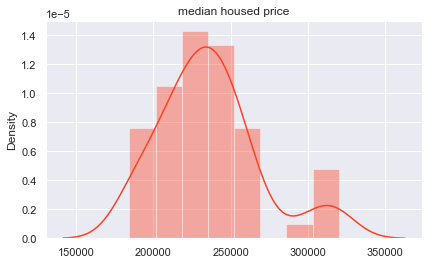

In [86]:
sns.distplot(a=df['median housed price'],color='#ff4125',axlabel=False).set_title('median housed price')

Text(0.5, 1.0, 'claim_mean')

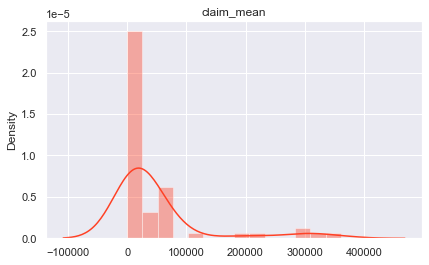

In [87]:
sns.distplot(a=df['claim_mean'],color='#ff4125',axlabel=False).set_title('claim_mean')

In [88]:
df['claim']=np.log1p(df['claim'])

Text(0.5, 1.0, 'log(1+claim)')

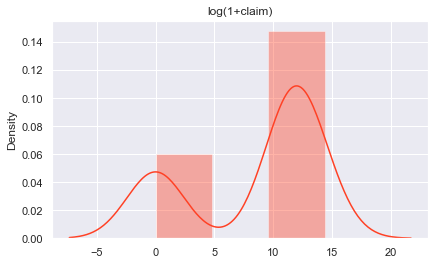

In [89]:
sns.distplot(a=df['claim'],color='#ff4125',axlabel=False).set_title('log(1+claim)')

Text(0.5, 1.0, 'crime_sum')

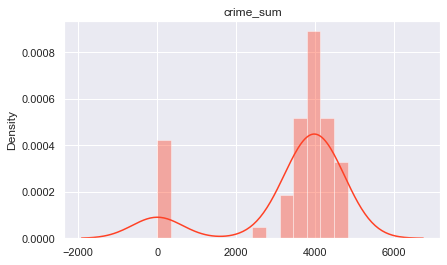

In [90]:
sns.distplot(a=df['crime_sum'],color='#ff4125',axlabel=False).set_title('crime_sum')

Text(0.5, 1.0, 'unemployed persons')

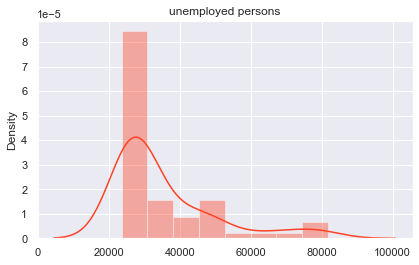

In [91]:
sns.distplot(a=df['unemployed persons'],color='#ff4125',axlabel=False).set_title('unemployed persons')

In [92]:
cor_mat= df[:].corr()
cor_with_tar=cor_mat.sort_values(['median housed price'],ascending=False)

In [93]:
print("The most relevant features (numeric) for the target are :")
cor_with_tar['median housed price']

The most relevant features (numeric) for the target are :


median housed price     1.000000
pricepersqrfeet         0.872513
unemployed persons      0.358644
covid_sum               0.180679
claim_mean              0.169907
listing count number    0.155893
death_sum               0.151402
death_mean              0.137988
covid_mean              0.136933
private_employees       0.070002
Unemployment Value      0.007622
Unemployment Rate      -0.002075
employed               -0.075212
claim                  -0.295439
crime_sum              -0.623327
crime_mean             -0.623327
listing                -0.652117
Name: median housed price, dtype: float64

<AxesSubplot:>

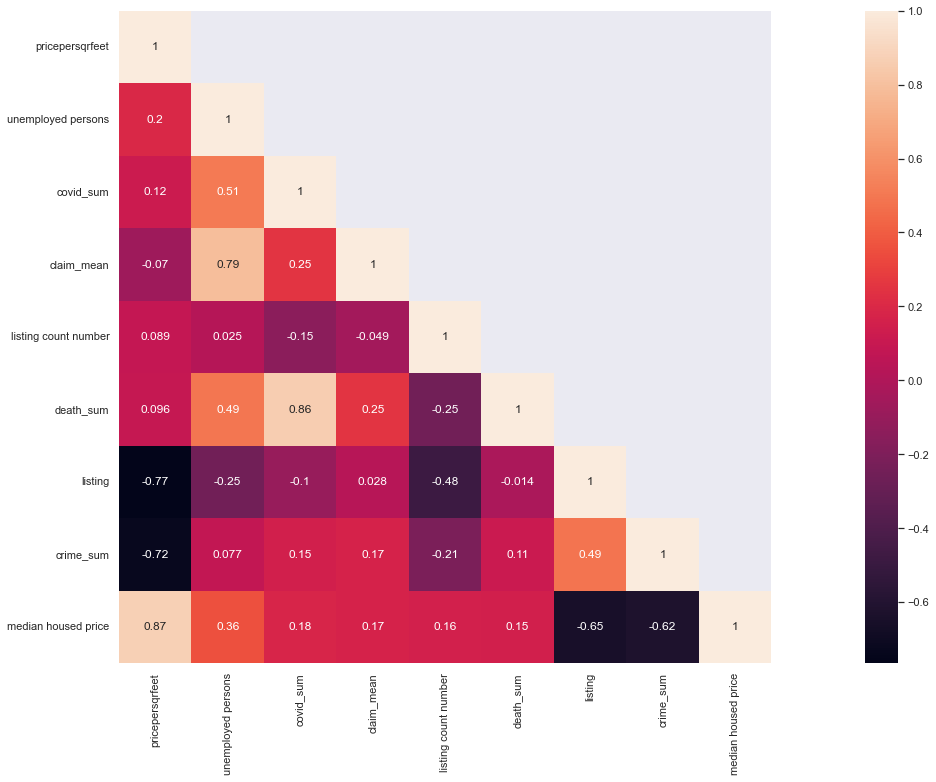

In [94]:
# using a corelation map to visualize features with high corelation.
cor_mat= df[['pricepersqrfeet','unemployed persons','covid_sum','claim_mean','listing count number','death_sum',
             'listing','crime_sum','median housed price']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

# some inference section.

In [95]:
#univarate analysis
def plot_num(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

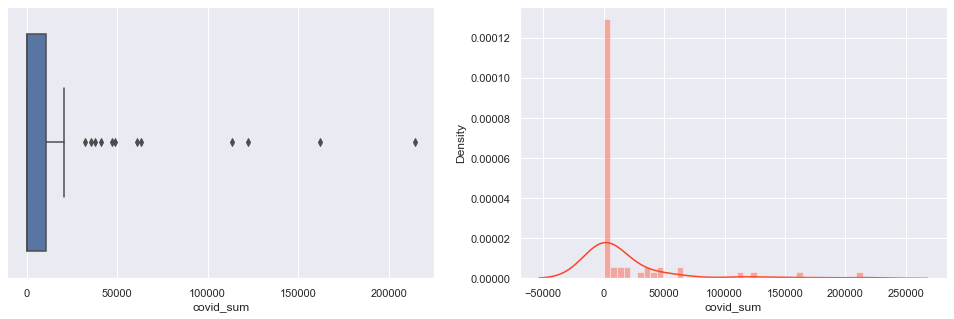

In [96]:
plot_num('covid_sum')

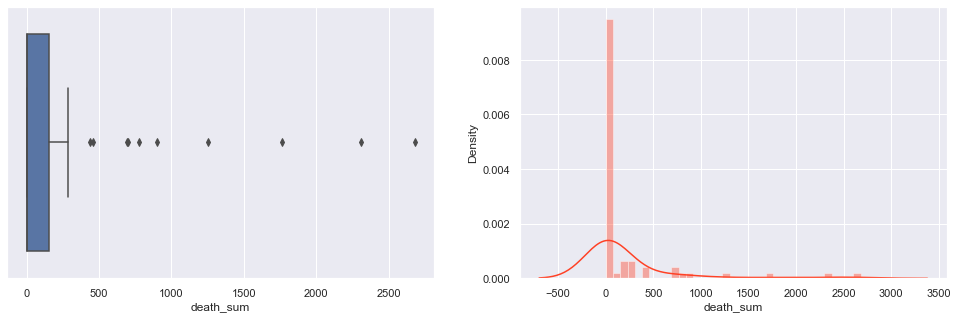

In [97]:
plot_num('death_sum')

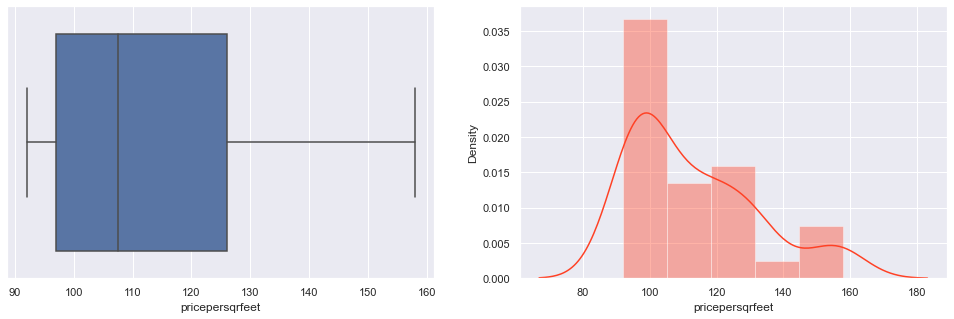

In [98]:
plot_num('pricepersqrfeet')

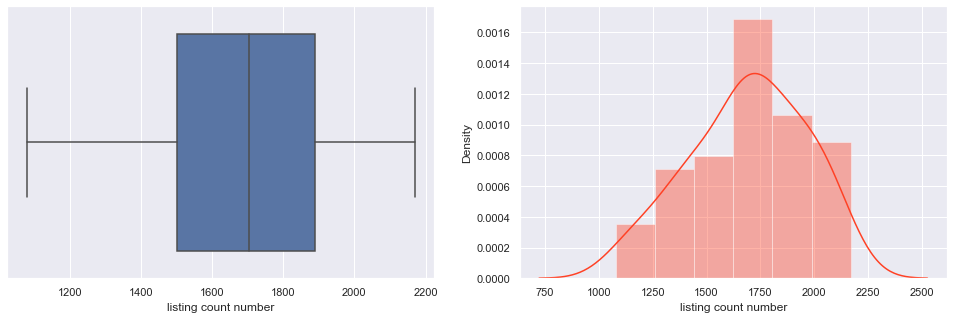

In [99]:
plot_num('listing count number')

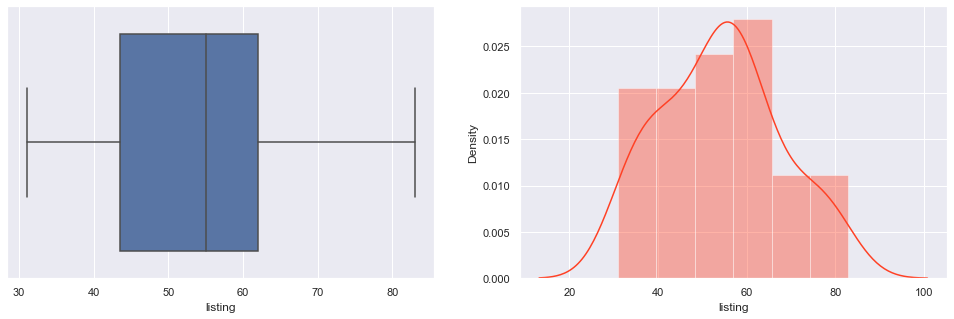

In [146]:
plot_num('listing')

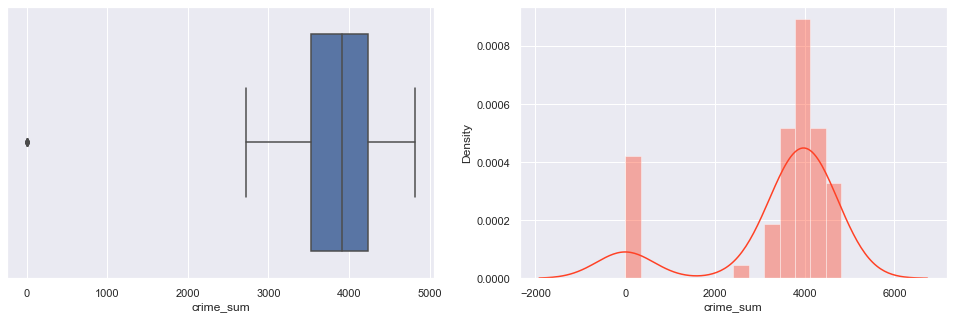

In [147]:
plot_num('crime_sum')

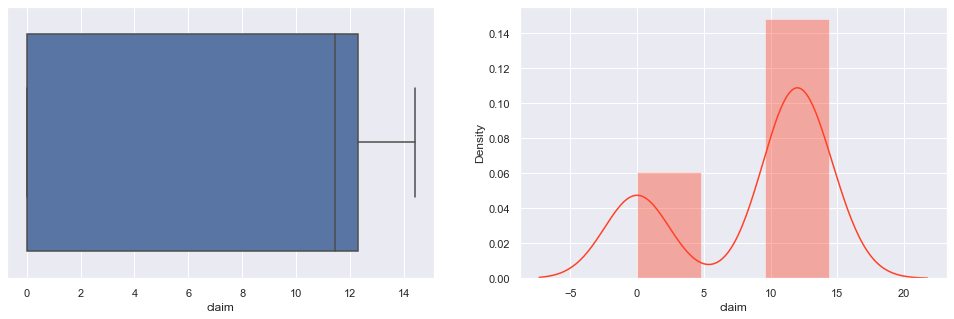

In [148]:
plot_num('claim')

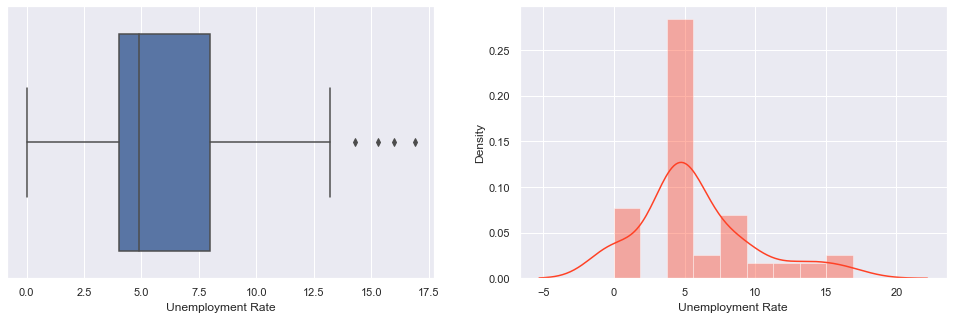

In [149]:
plot_num('Unemployment Rate')

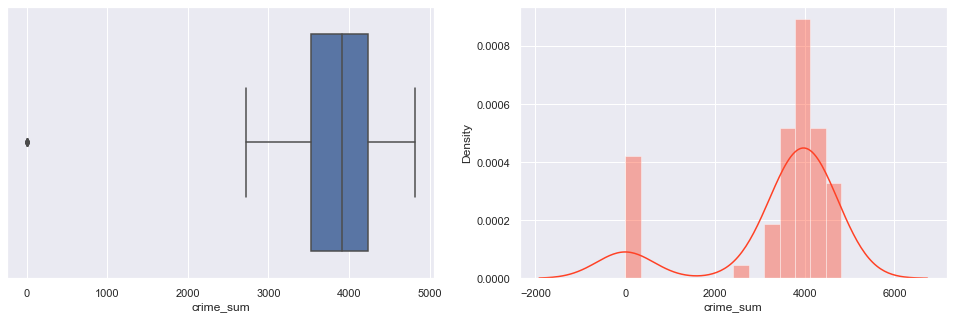

In [150]:
plot_num('crime_sum')

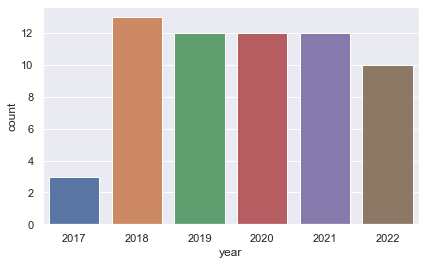

In [151]:
#categorical values
def plot_cat(feature):
  sns.countplot(data=df,x=feature)
  ax=sns.countplot(data=df,x=feature)
plot_cat('year')

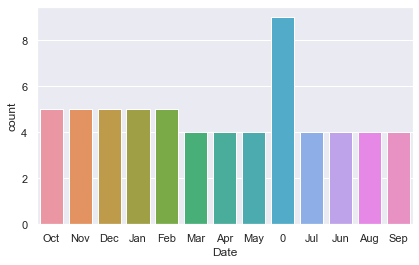

In [152]:
plot_cat('Date')

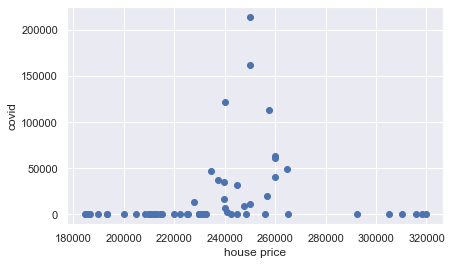

In [153]:
#Bivarate analysis
fig, ax = plt.subplots()
ax.scatter(y = df['covid_sum'], x = df['median housed price'])
plt.xlabel('house price')
plt.ylabel('covid')
plt.show()

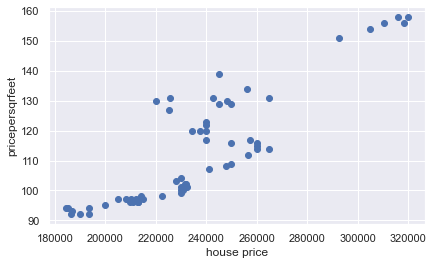

In [154]:
fig, ax = plt.subplots()
ax.scatter(y = df['pricepersqrfeet'], x = df['median housed price'])
plt.xlabel('house price')
plt.ylabel('pricepersqrfeet')
plt.show()

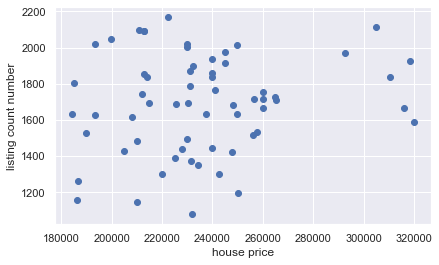

In [155]:
fig, ax = plt.subplots()
ax.scatter(y = df['listing count number'], x = df['median housed price'])
plt.xlabel('house price')
plt.ylabel('listing count number')
plt.show()

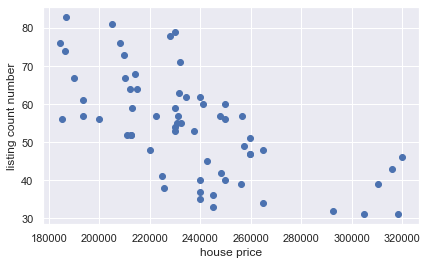

In [156]:
fig, ax = plt.subplots()
ax.scatter(y = df['listing'], x = df['median housed price'])
plt.xlabel('house price')
plt.ylabel('listing count number')
plt.show()

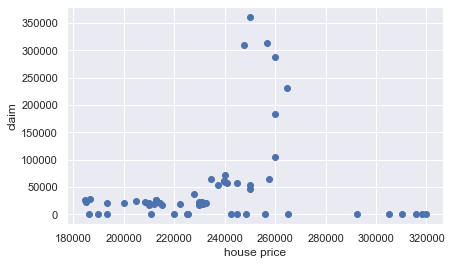

In [157]:
fig, ax = plt.subplots()
ax.scatter(y = df['claim_mean'], x = df['median housed price'])
plt.xlabel('house price')
plt.ylabel('claim')
plt.show()

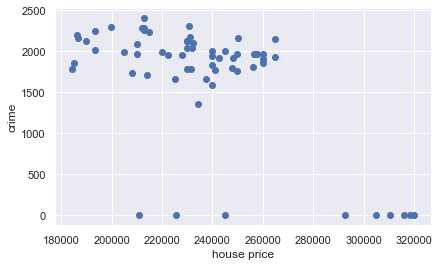

In [158]:
fig, ax = plt.subplots()
ax.scatter(y = df['crime_mean'], x = df['median housed price'])
plt.xlabel('house price')
plt.ylabel('crime')
plt.show()

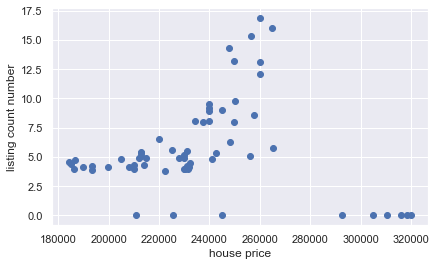

In [159]:
fig, ax = plt.subplots()
ax.scatter(y = df['Unemployment Rate'], x = df['median housed price'])
plt.xlabel('house price')
plt.ylabel('listing count number')
plt.show()


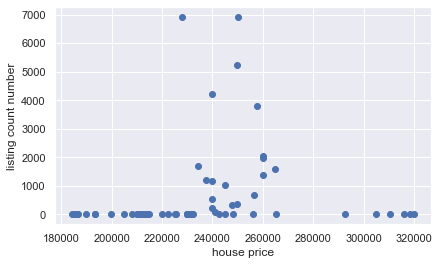

In [160]:
fig, ax = plt.subplots()
ax.scatter(y = df['covid_mean'], x = df['median housed price'])
plt.xlabel('house price')
plt.ylabel('listing count number')
plt.show()

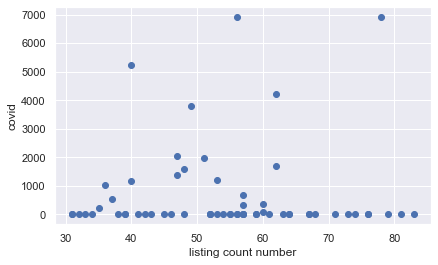

In [161]:
fig, ax = plt.subplots()
ax.scatter(y = df['covid_mean'], x = df['listing'])
plt.ylabel('covid')
plt.xlabel('listing count number')
plt.show()

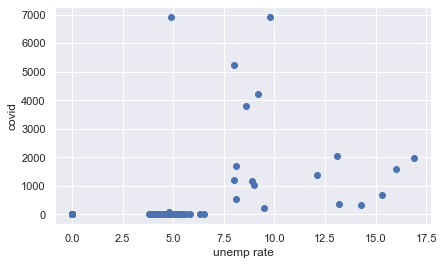

In [162]:
fig, ax = plt.subplots()
ax.scatter(y = df['covid_mean'], x = df['Unemployment Rate'])
plt.xlabel('unemp rate')
plt.ylabel('covid')
plt.show()
#covid increases unemployement increases

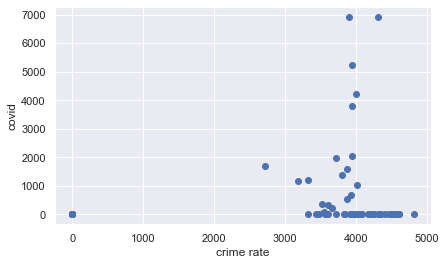

In [163]:
fig, ax = plt.subplots()
ax.scatter(y = df['covid_mean'], x = df['crime_sum'])
plt.xlabel('crime rate')
plt.ylabel('covid')
plt.show()
#covid increases crime rate seems increasing

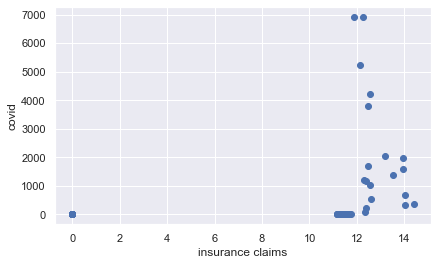

In [164]:
fig, ax = plt.subplots()
ax.scatter(y = df['covid_mean'], x = df['claim'])
plt.xlabel('insurance claims')
plt.ylabel('covid')
plt.show()
#covid increases insurance claims also increases

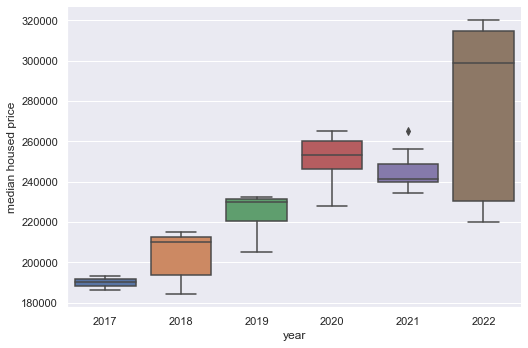

In [165]:
sns.factorplot(data=df,x='year',y='median housed price',kind='box',size=5,aspect=1.5)

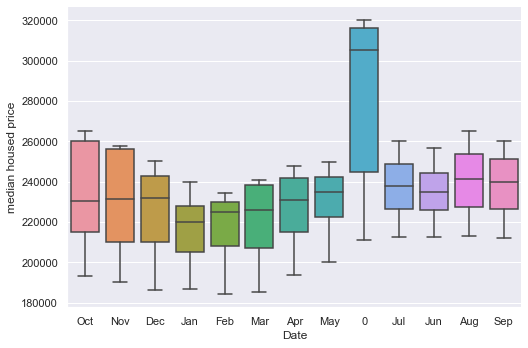

In [166]:
sns.factorplot(data=df,x='Date',y='median housed price',kind='box',size=5,aspect=1.5)

In [167]:
nan_all_data = (df.isnull().sum())
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df

,Missing Ratio


In [168]:
#log transform skewed numeric features:
numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.50]
skewed_feats = skewed_feats.index

df[skewed_feats] = np.log1p(df[skewed_feats])

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  62 non-null     object 
 1   covid_mean            62 non-null     float64
 2   covid_sum             62 non-null     float64
 3   death_mean            62 non-null     float64
 4   death_sum             62 non-null     float64
 5   Date                  62 non-null     object 
 6   Unemployment Rate     62 non-null     float64
 7   Unemployment Value    62 non-null     float64
 8   claim_mean            62 non-null     float64
 9   claim                 62 non-null     float64
 10  crime_mean            62 non-null     float64
 11  crime_sum             62 non-null     float64
 12  private_employees     62 non-null     float64
 13  unemployed persons    62 non-null     float64
 14  employed              62 non-null     int64  
 15  listing               62 

In [170]:
df['year'] = df['year'].map(str)

In [171]:
df['Date']=df['Date'].replace(["0"],'not defined')
df['Date']=df['Date'].replace(["Oct"],'9')
df['Date']=df['Date'].replace(["Jan"],'0')
df['Date']=df['Date'].replace(["Feb"],'1')
df['Date']=df['Date'].replace(["Mar"],'2')
df['Date']=df['Date'].replace(["Apr"],'3')
df['Date']=df['Date'].replace(["May"],'4')
df['Date']=df['Date'].replace(["Jun"],'5')
df['Date']=df['Date'].replace(["Jul"],'6')
df['Date']=df['Date'].replace(["Aug"],'7')
df['Date']=df['Date'].replace(["Sep"],'8')
df['Date']=df['Date'].replace(["Nov"],'10')
df['Date']=df['Date'].replace(["Dec"],'11')
df['Date']=df['Date'].replace(["not defined"],'12')

In [172]:
for col in df.columns:
    if(df[col].dtype == 'string'):
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])

In [173]:
train=df.loc[:(df.shape)[0]+2,:]
test=df.loc[(df.shape)[0]+2:,:]

In [174]:
train.head()

,year,covid_mean,covid_sum,death_mean,death_sum,Date,Unemployment Rate,Unemployment Value,claim_mean,claim,crime_mean,crime_sum,private_employees,unemployed persons,employed,listing,median housed price,listing count number,pricepersqrfeet
0,2017,0.0,0.0,0.0,0.0,9,1.648659,9.427466,0.000000,0.000000,2245.0,4490.0,561.400505,10.099383,603719,61,12.172521,1626,4.532599
1,2017,0.0,0.0,0.0,0.0,10,1.629241,9.398478,0.000000,0.000000,2119.5,4239.0,561.429514,10.103035,603909,67,12.154521,1530,4.532599
2,2017,0.0,0.0,0.0,0.0,11,1.609438,9.387231,0.000000,0.000000,2203.0,4406.0,562.602794,10.097449,607759,74,12.134851,1160,4.532599
3,2018,0.0,0.0,0.0,0.0,0,1.740466,9.532424,10.220986,11.607253,2162.5,4325.0,559.861587,10.092661,609007,83,12.137531,1264,4.543295
4,2018,0.0,0.0,0.0,0.0,1,1.722767,9.523909,10.199054,11.585321,1787.5,3575.0,562.313979,10.194103,596736,76,12.125004,1634,4.553877


In [175]:
train['median housed price']=df['median housed price']
train['median housed price'].fillna(np.mean(train['median housed price']),inplace=True)
train.shape
print(train['median housed price'].isnull().sum())

0


In [176]:
x_train,x_test,y_train,y_test=train_test_split(train.drop(['median housed price'],axis=1),train['median housed price'],test_size=0.20,random_state=42)

In [177]:
#linear regression
reg_lin=LinearRegression()
reg_lin.fit(x_train,y_train)
pred=reg_lin.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.07237315744231045


In [178]:
#LASSO (and tuning with GridSearchCV)
reg_lasso=Lasso()
reg_lasso.fit(x_train,y_train)
pred=reg_lasso.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.11268445713416149


In [179]:
#tuning the lasso regression 
params_dict={'alpha':[0.001, 0.005, 0.01,0.05,0.1,0.5,1]}
reg_lasso_CV=GridSearchCV(estimator=Lasso(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
reg_lasso_CV.fit(x_train,y_train)
pred=reg_lasso_CV.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.0465541201376998


In [180]:
#Note the significant decrease in the RMSE on tuning the Lasso Regression.

In [181]:
reg_lasso_CV.best_params_

{'alpha': 0.005}

In [182]:
#RIDGE (and tuning with GridSearchCV)
reg_ridge=Ridge()
reg_ridge.fit(x_train,y_train)
pred=reg_ridge.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.04947415245855621


In [183]:
params_dict={'alpha':[0.1, 0.15, 0.20,0.25,0.30,0.35,0.4,0.45,0.50,0.55,0.60]}
reg_ridge_CV=GridSearchCV(estimator=Ridge(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
reg_ridge_CV.fit(x_train,y_train)
pred=reg_ridge_CV.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.05034433018451433


In [184]:
reg_ridge_CV.best_params_

{'alpha': 0.6}

In [185]:
#the params are tuned with grid searchCV.

reg_gb=GradientBoostingRegressor(n_estimators=2000,learning_rate=0.05,max_depth=3,min_samples_split=10,max_features='sqrt',subsample=0.75 ,loss='huber')
reg_gb.fit(x_train,y_train)
pred=reg_gb.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.053477773608697536


In [186]:
df =df.drop('year',axis=1)

In [187]:
df =df.drop('Date',axis=1)

In [188]:
train=df.loc[:(df.shape)[0]+2,:]
test=df.loc[(df.shape)[0]+2:,:]

In [189]:
x_train,x_test,y_train,y_test=train_test_split(train.drop(['median housed price'],axis=1),train['median housed price'],test_size=0.20,random_state=42)

In [190]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(x_train,y_train)
pred=model_xgb.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

[14:06:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.12084890138221657


In [191]:
# we conclude that lasso regression model has the least mean square error that can be used for
#prediction in future occurance of pandemic situation

In [ ]:
#crime rate prediction

In [192]:
train1=df.loc[:(df.shape)[0]+2,:]
test1=df.loc[(df.shape)[0]+2:,:]

In [193]:
train1['crime_mean']=df['crime_mean']
train1['crime_mean'].fillna(np.mean(train['crime_mean']),inplace=True)
train1.shape
print(train1['crime_mean'].isnull().sum())

0


In [194]:
x_train,x_test,y_train,y_test=train_test_split(train.drop(['crime_mean'],axis=1),train['crime_mean'],test_size=0.20,random_state=42)

In [195]:
#linear regression
reg_lin=LinearRegression()
reg_lin.fit(x_train,y_train)
pred=reg_lin.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

4.786987645986213e-13


In [196]:
#LASSO (and tuning with GridSearchCV)
reg_lasso=Lasso()
reg_lasso.fit(x_train,y_train)
pred=reg_lasso.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.0011313860690905142


In [197]:
reg_lasso_CV.best_params_

{'alpha': 0.005}

In [198]:
#RIDGE (and tuning with GridSearchCV)
reg_ridge=Ridge()
reg_ridge.fit(x_train,y_train)
pred=reg_ridge.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

2.8142416834338645e-05


In [199]:
#unemployement rate 
train2=df.loc[:(df.shape)[0]+2,:]
test2=df.loc[(df.shape)[0]+2:,:]

In [205]:
train2['Unemployment Rate']=df['Unemployment Rate']
train2['Unemployment Rate'].fillna(np.mean(train['Unemployment Rate']),inplace=True)
train2.shape
print(train2['Unemployment Rate'].isnull().sum())

0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(train.drop(['crime_mean'],axis=1),train['crime_mean'],test_size=0.20,random_state=42)